[LOAD] IRON_I
[LOAD] IRON_II
[LOAD] IRON_III
[LOAD] IRON_IV
[LOAD] BRONZE_I
[LOAD] BRONZE_II
[LOAD] BRONZE_III
[LOAD] BRONZE_IV
[LOAD] SILVER_I
[LOAD] SILVER_II
[LOAD] SILVER_III
[LOAD] SILVER_IV
[LOAD] GOLD_I
[LOAD] GOLD_II
[LOAD] GOLD_III
[LOAD] GOLD_IV
[LOAD] PLATINUM_I
[LOAD] PLATINUM_II
[LOAD] PLATINUM_III
[LOAD] PLATINUM_IV
[LOAD] EMERALD_I
[LOAD] EMERALD_II
[LOAD] EMERALD_III
[LOAD] EMERALD_IV
[LOAD] DIAMOND_I
[LOAD] DIAMOND_II
[LOAD] DIAMOND_III
[LOAD] DIAMOND_IV
[LOAD] MASTER
[LOAD] GRANDMASTER
[LOAD] CHALLENGER

[HEATMAP] IRON


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


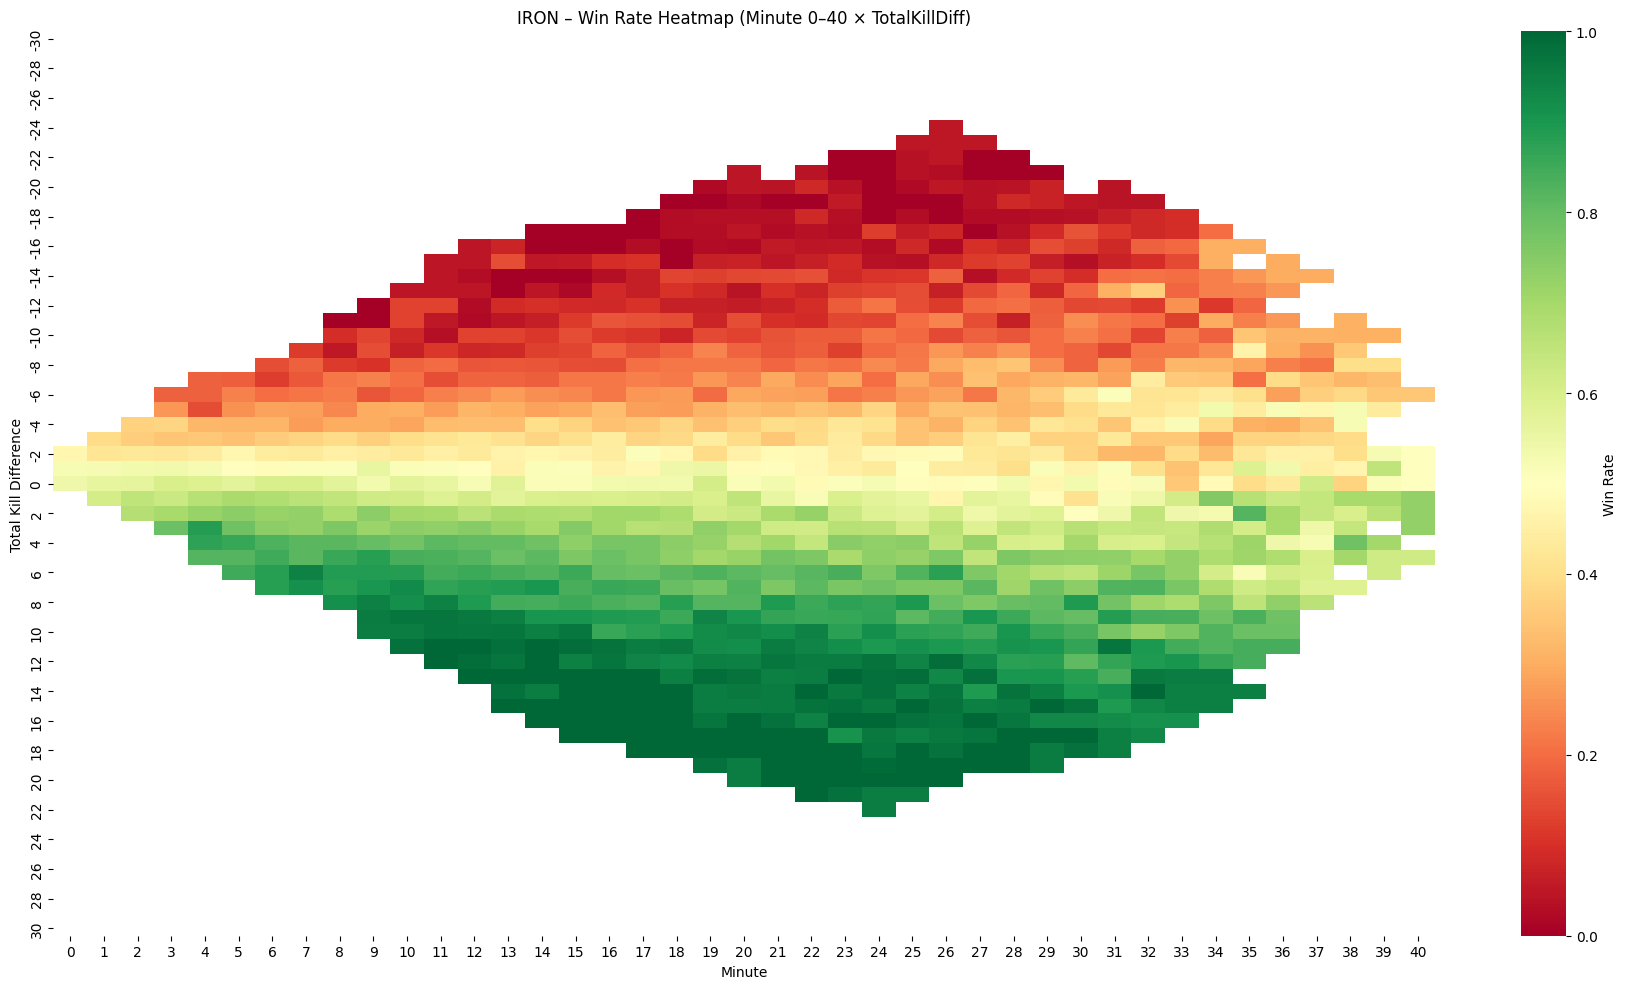


[HEATMAP] BRONZE


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


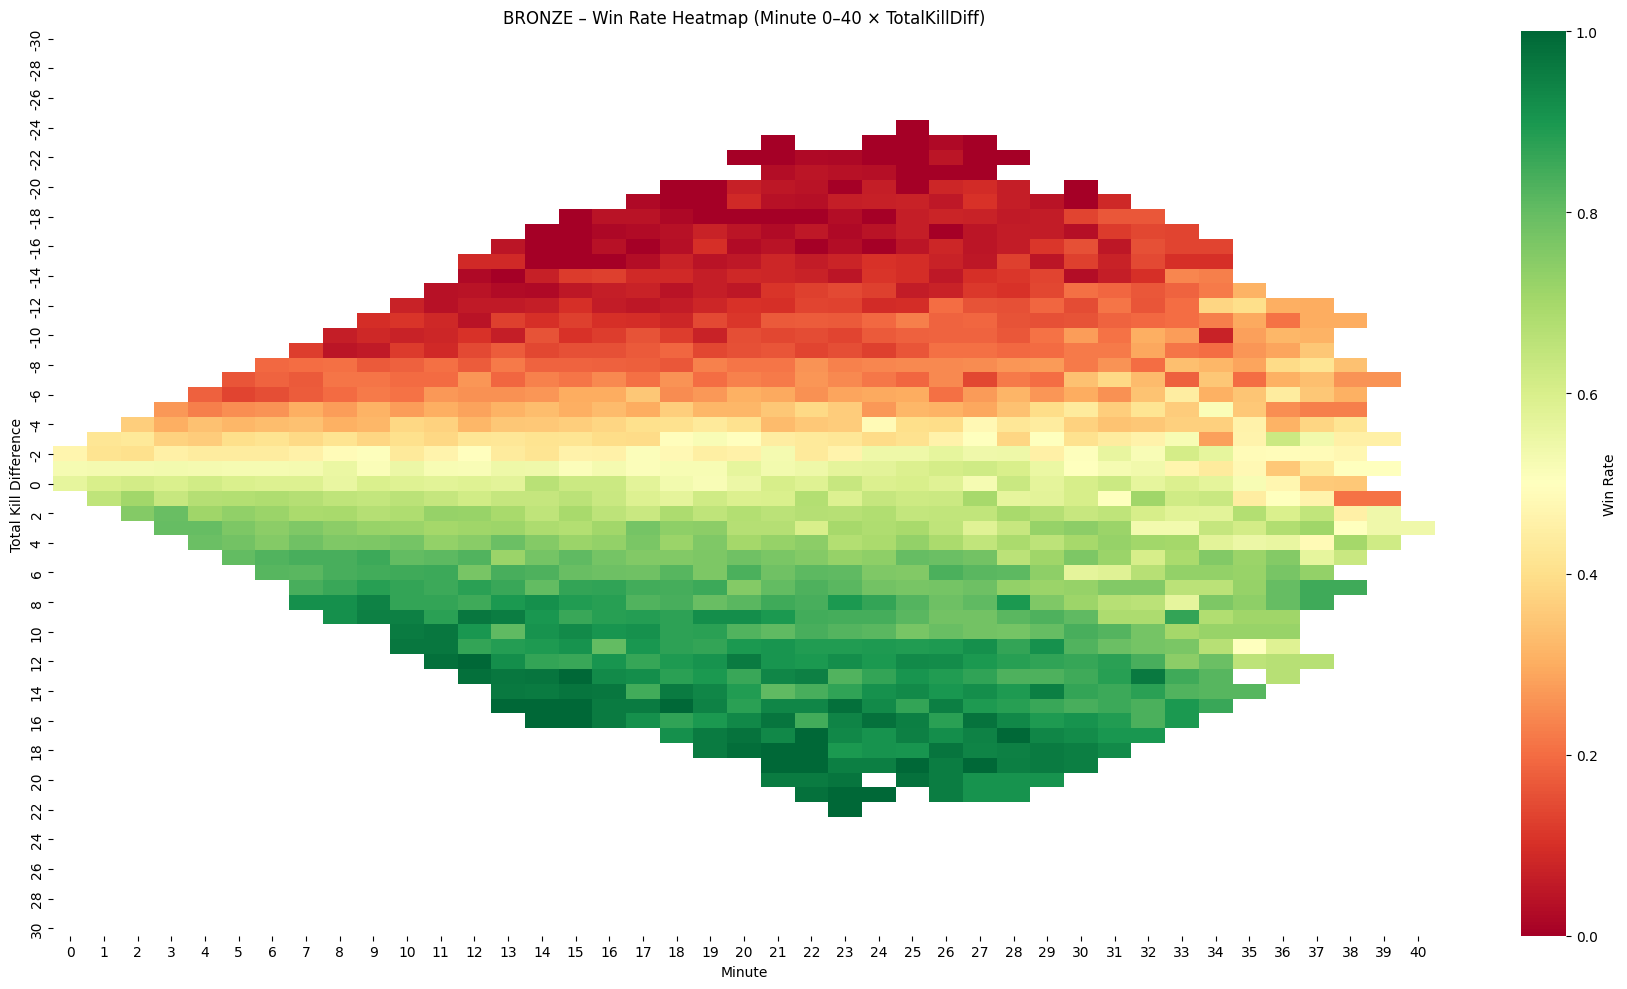


[HEATMAP] SILVER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


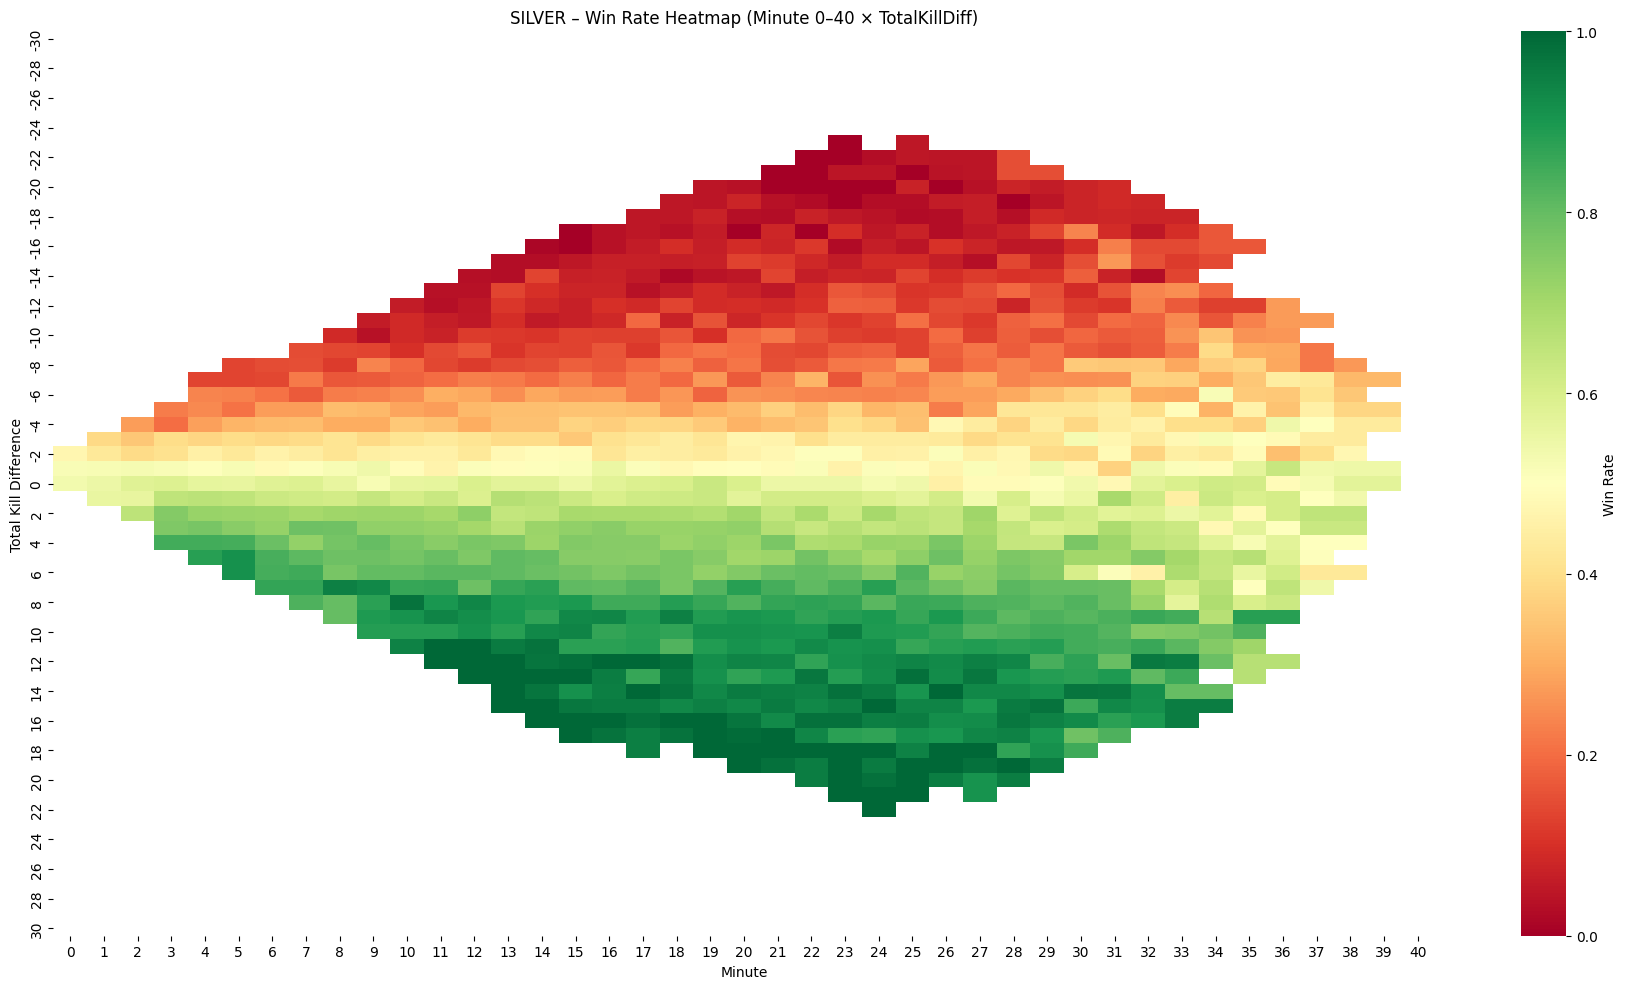


[HEATMAP] GOLD


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


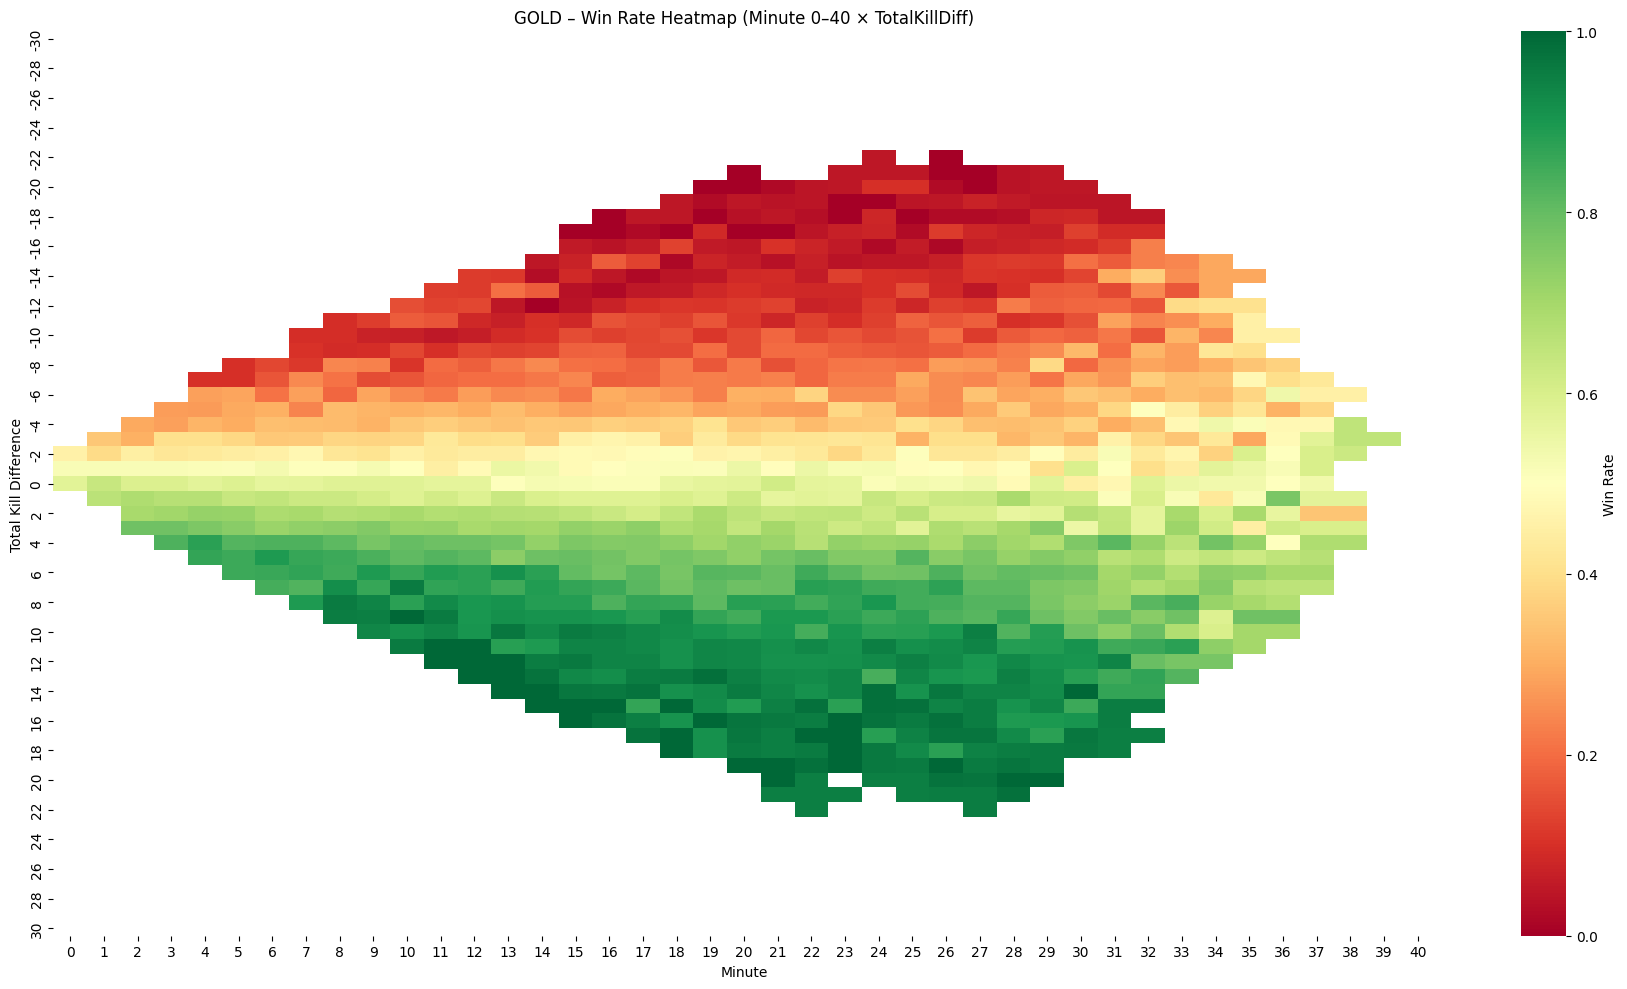


[HEATMAP] PLATINUM


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


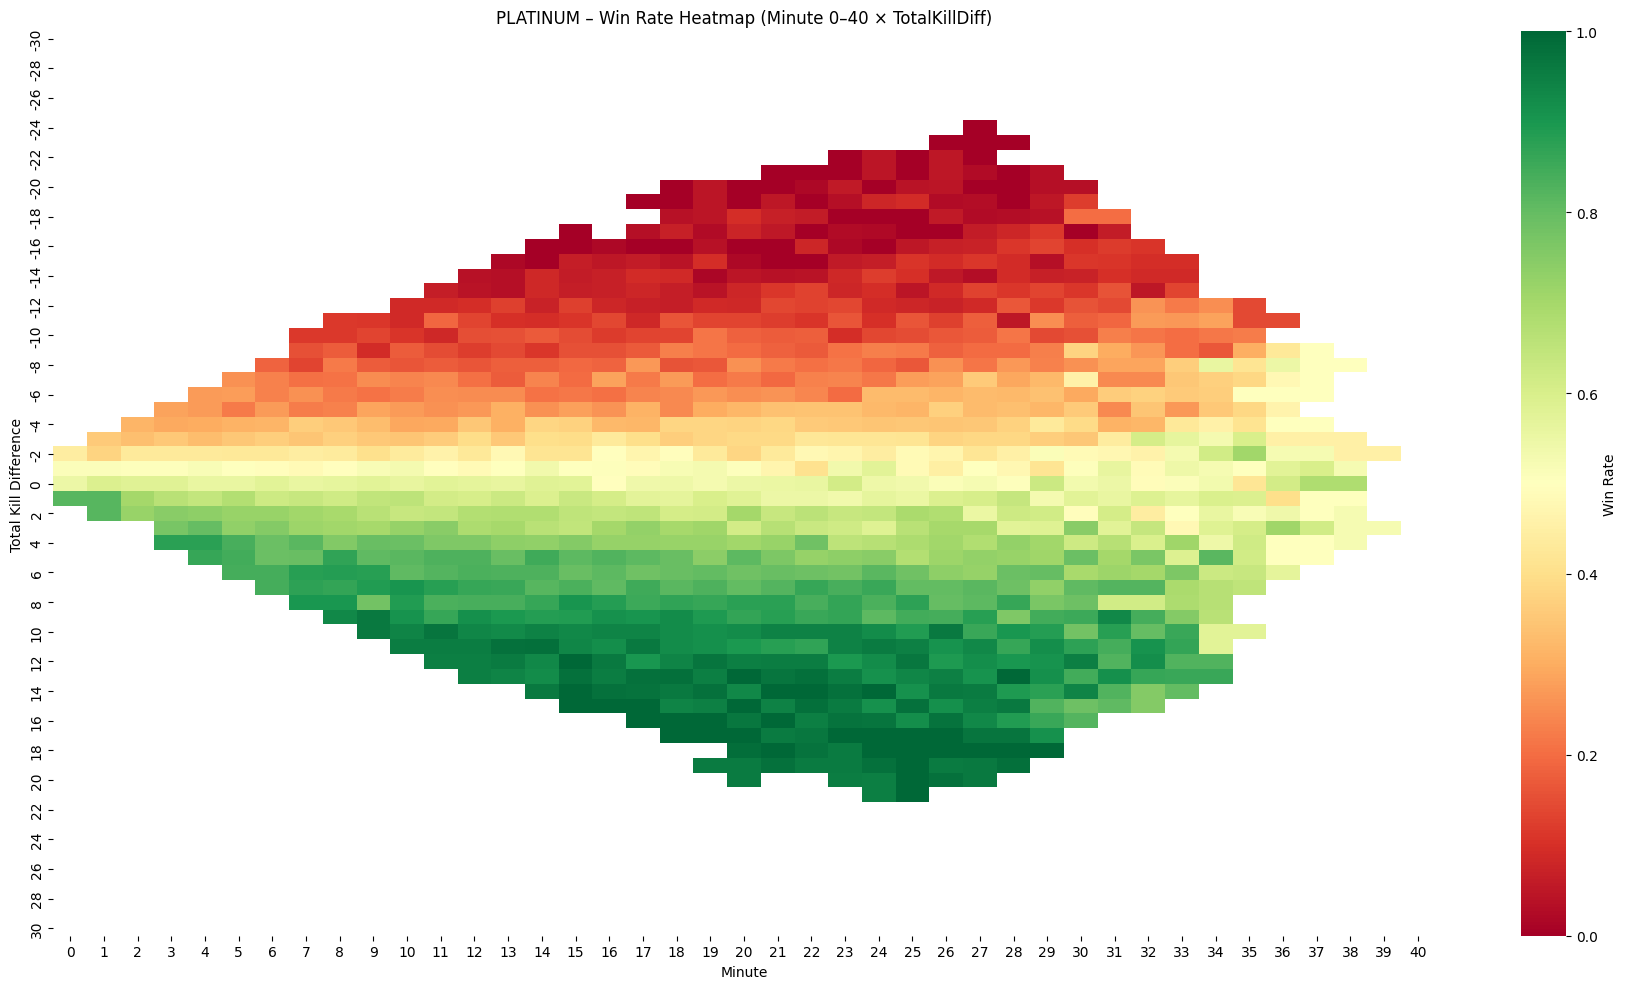


[HEATMAP] EMERALD


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


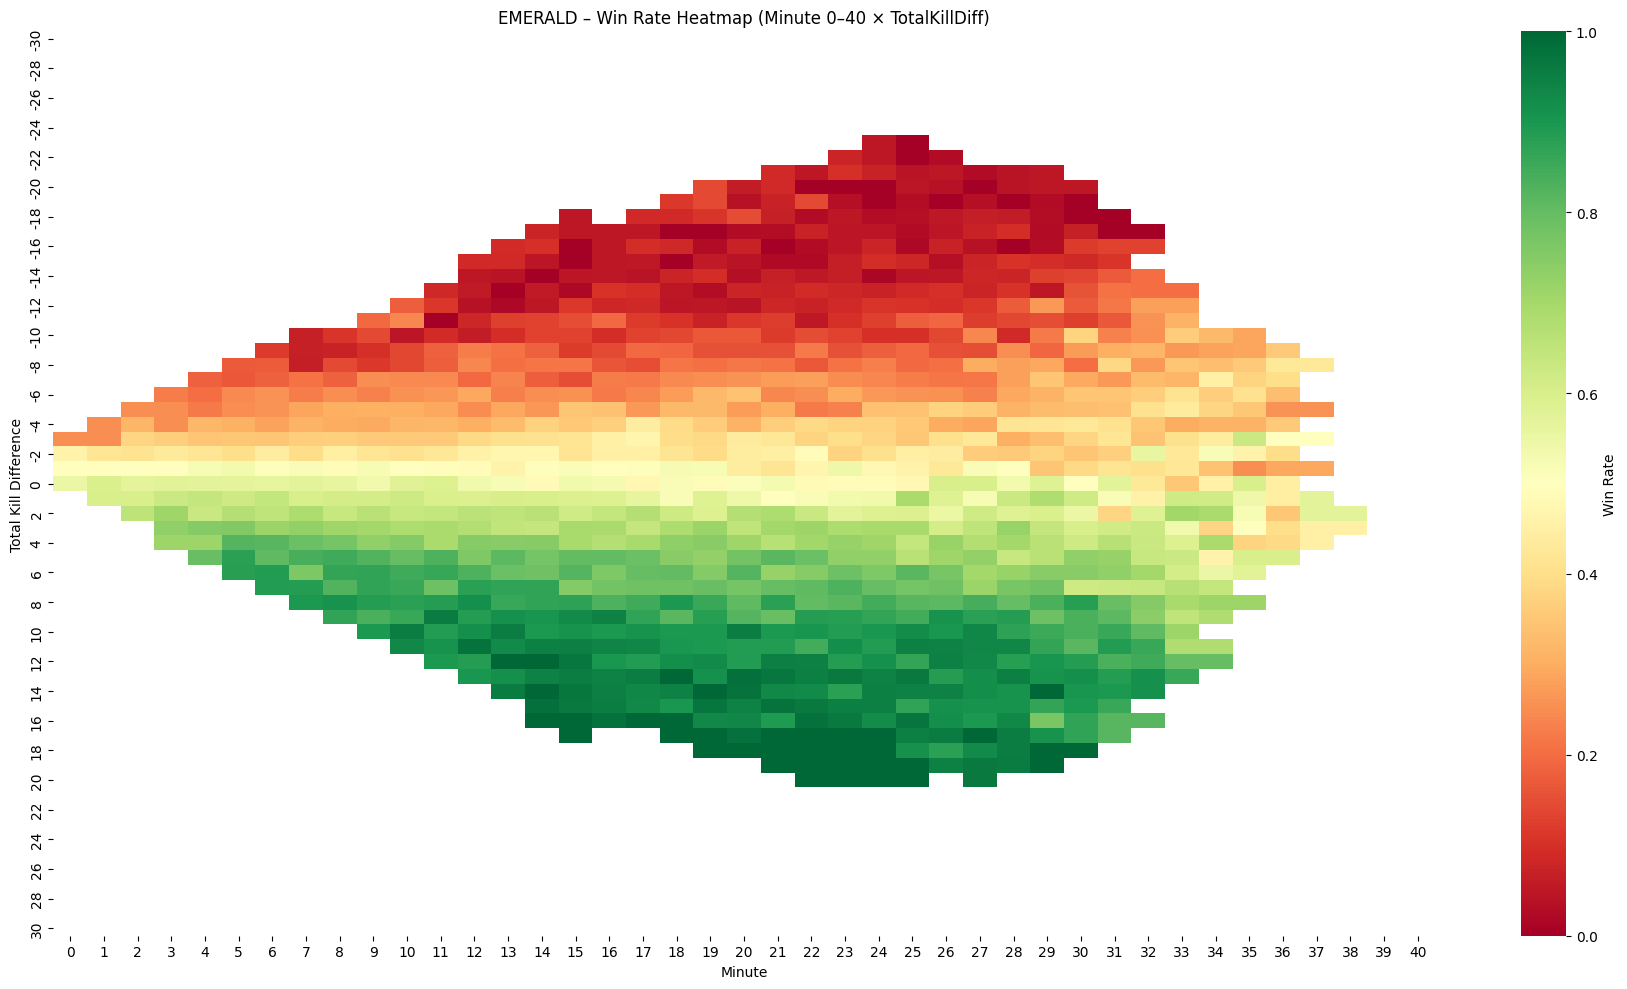


[HEATMAP] DIAMOND


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


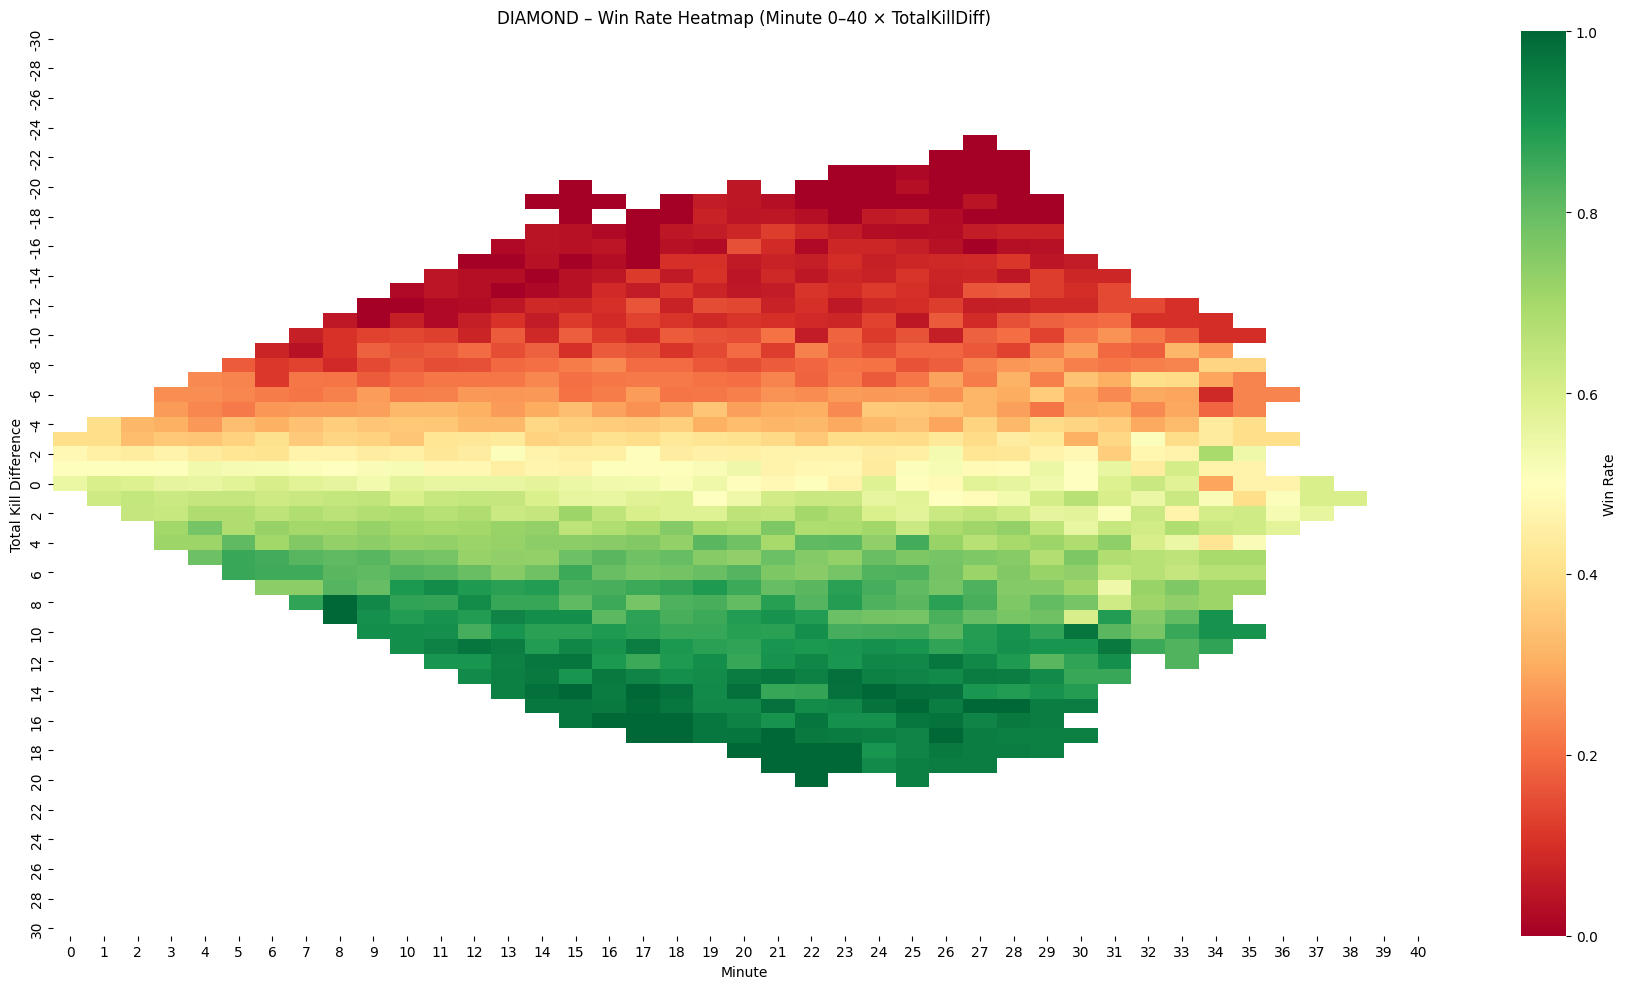


[HEATMAP] MASTER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


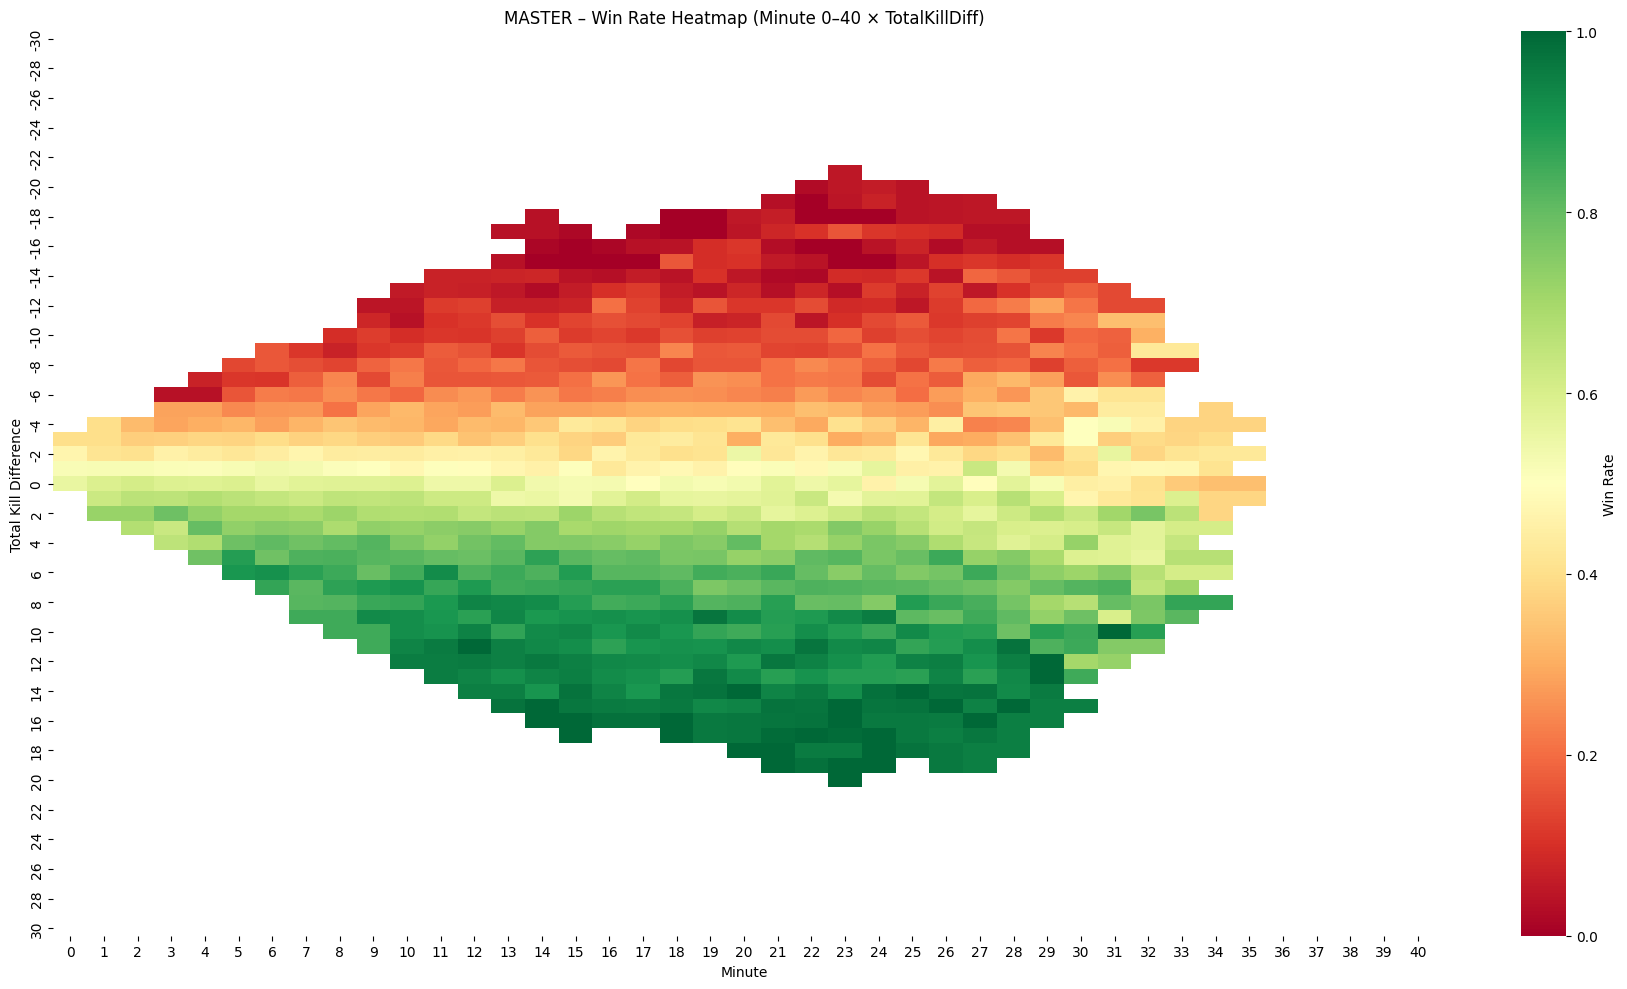


[HEATMAP] GRANDMASTER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


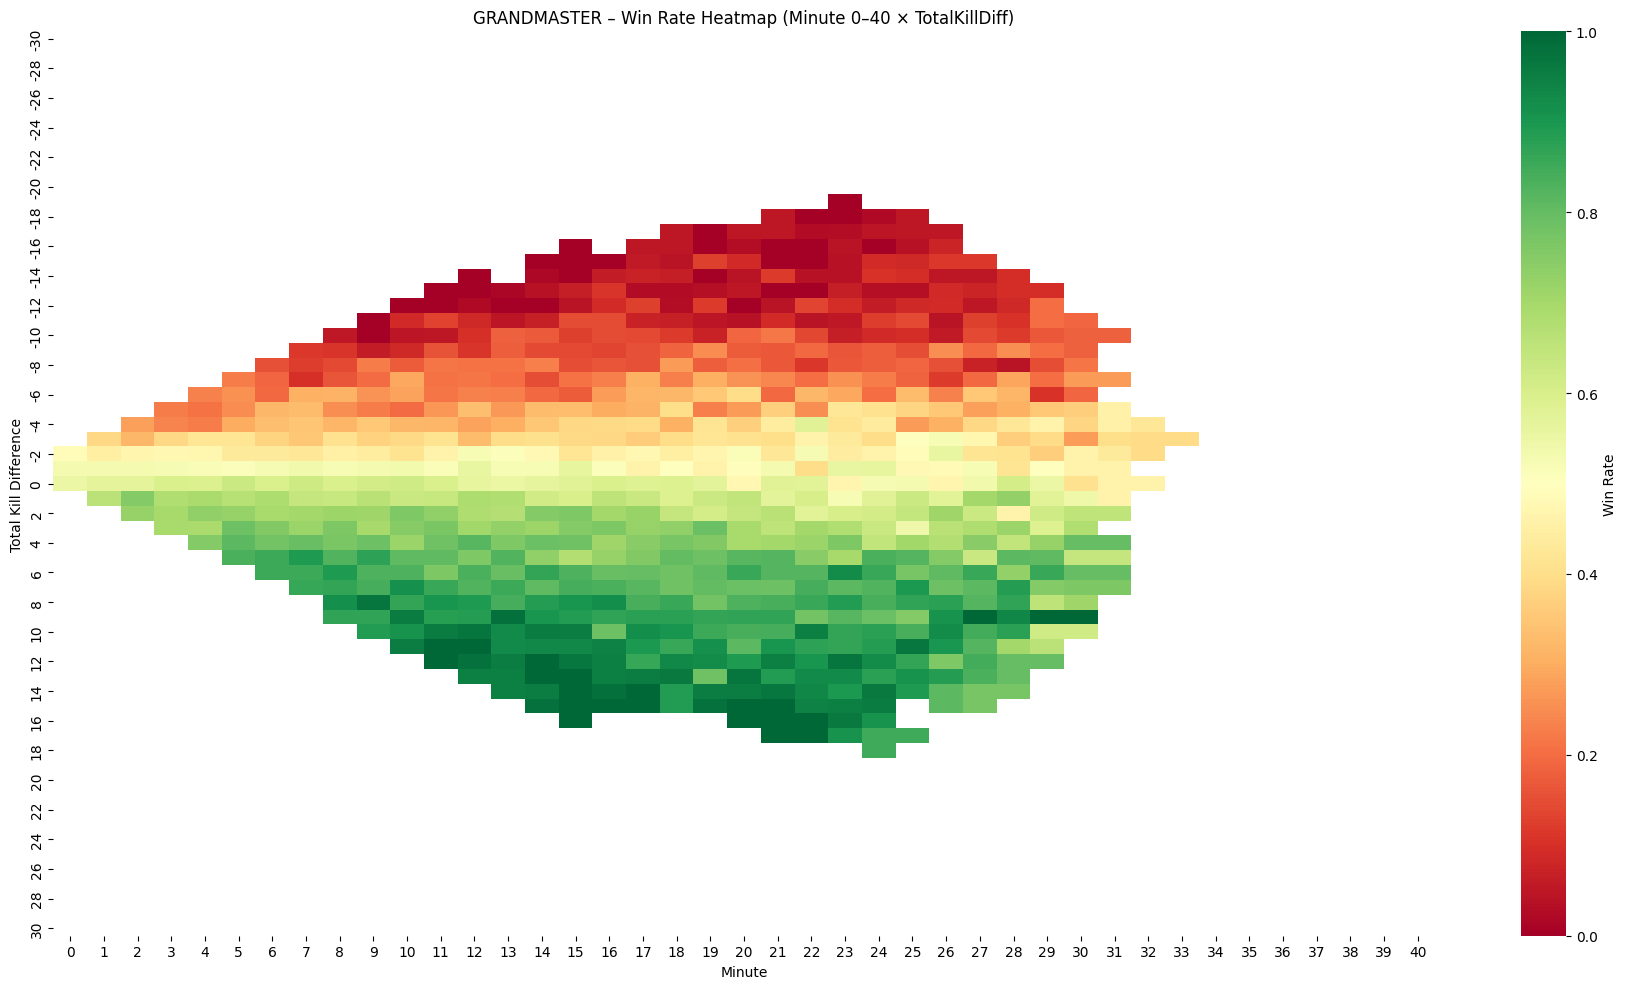


[HEATMAP] CHALLENGER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\1130996023.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


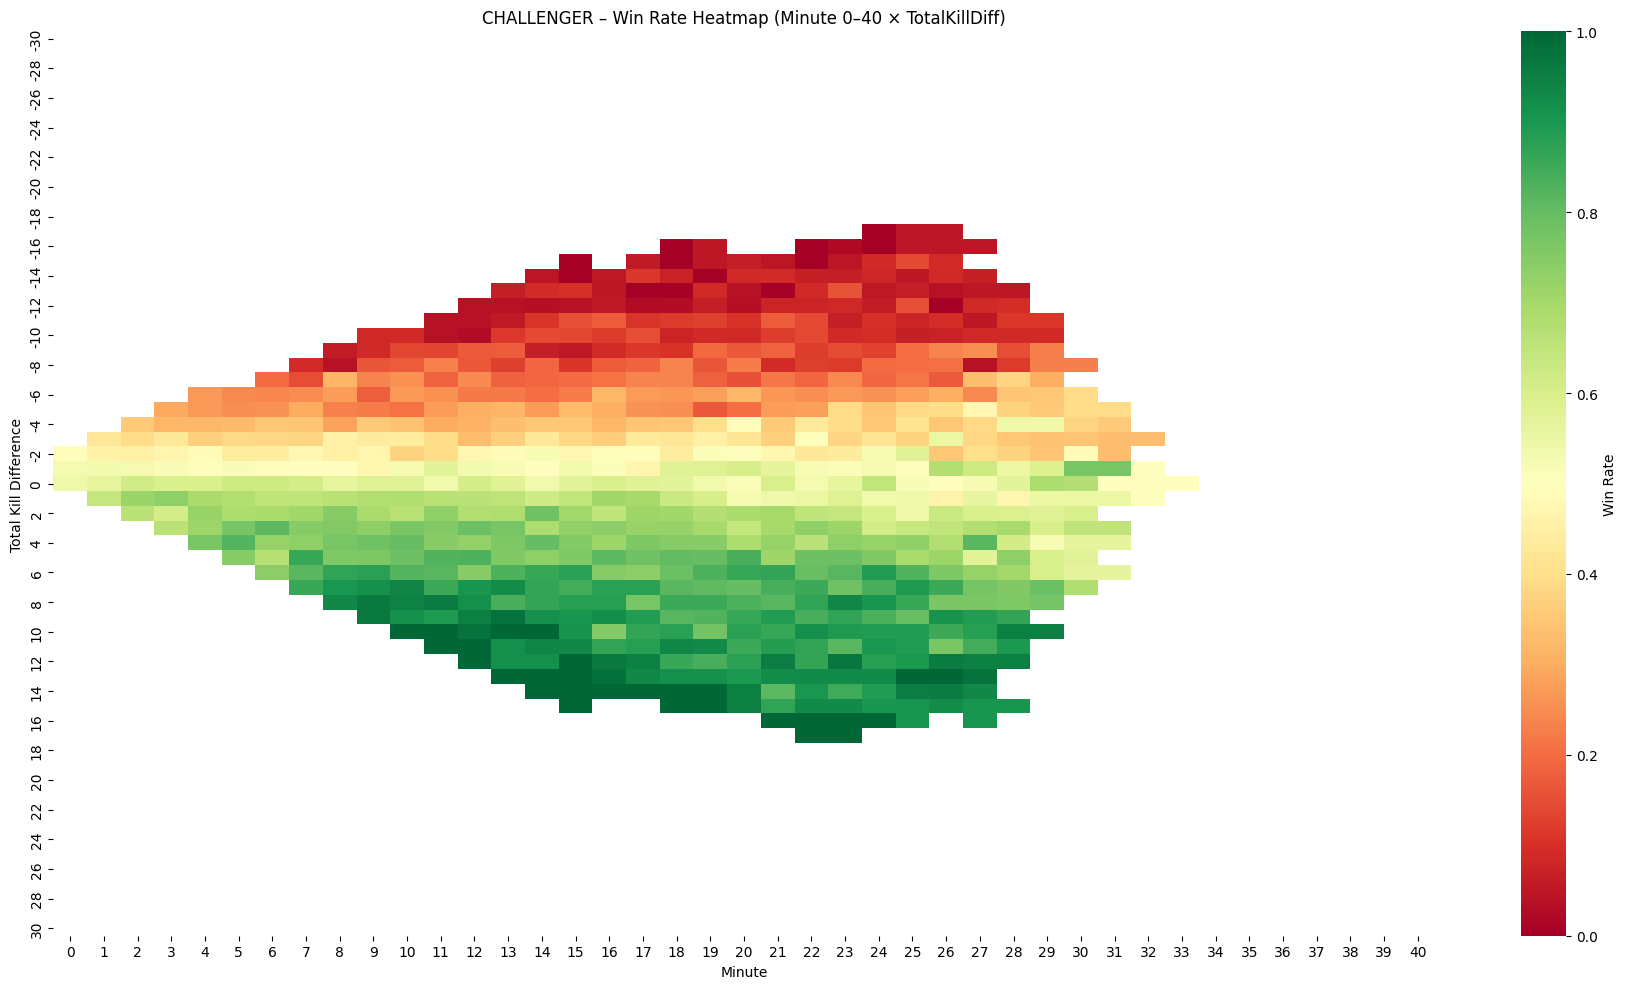

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 0. 설정
# ===============================
BASE_PATH = "../../../data/processed"

TIERS = [
    "IRON_I", "IRON_II", "IRON_III", "IRON_IV",
    "BRONZE_I", "BRONZE_II", "BRONZE_III", "BRONZE_IV",
    "SILVER_I", "SILVER_II", "SILVER_III", "SILVER_IV",
    "GOLD_I", "GOLD_II", "GOLD_III", "GOLD_IV",
    "PLATINUM_I", "PLATINUM_II", "PLATINUM_III", "PLATINUM_IV",
    "EMERALD_I", "EMERALD_II", "EMERALD_III", "EMERALD_IV",
    "DIAMOND_I", "DIAMOND_II", "DIAMOND_III", "DIAMOND_IV",
    "MASTER", "GRANDMASTER", "CHALLENGER"
]

TIER_ORDER = [
    "IRON", "BRONZE", "SILVER", "GOLD",
    "PLATINUM", "EMERALD", "DIAMOND",
    "MASTER", "GRANDMASTER", "CHALLENGER"
]

TARGET_METRIC = "totalKillDiff"

MAX_MINUTE = 40
KILL_BIN_SIZE = 1
KILL_RANGE = 30
MIN_SAMPLE = 100

# ===============================
# 1. 보조 함수
# ===============================
def get_major_tier(tier_name: str) -> str:
    return tier_name.split("_")[0] if "_" in tier_name else tier_name


def fill_nan_by_neighbors(df: pd.DataFrame) -> pd.DataFrame:
    filled = df.copy()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if pd.isna(df.iat[i, j]):
                neighbors = []

                if i > 0:
                    neighbors.append(df.iat[i - 1, j])
                if i < df.shape[0] - 1:
                    neighbors.append(df.iat[i + 1, j])
                if j > 0:
                    neighbors.append(df.iat[i, j - 1])
                if j < df.shape[1] - 1:
                    neighbors.append(df.iat[i, j + 1])

                neighbors = [v for v in neighbors if not pd.isna(v)]
                if neighbors:
                    filled.iat[i, j] = np.mean(neighbors)

    return filled


# ===============================
# 2. timeline → long_df
# ===============================
rows = []
diff_pattern = re.compile(r"(.*Diff)_(\d+)$")

for tier in TIERS:
    timeline_path = f"{BASE_PATH}/{tier}_timeline.csv"
    matches_path  = f"{BASE_PATH}/{tier}_matches.csv"

    if not os.path.exists(timeline_path):
        continue

    print(f"[LOAD] {tier}")

    timeline = pd.read_csv(timeline_path)
    matches  = pd.read_csv(matches_path)

    winner_team = (
        matches[matches["win"] == 1]
        .rename(columns={"teamId": "winnerTeamId"})[["matchId", "winnerTeamId"]]
    )

    df = timeline.merge(winner_team, on="matchId", how="left")
    df["win"] = (df["winnerTeamId"] == 100).astype(int)

    major_tier = get_major_tier(tier)

    kill_cols = {}
    for col in df.columns:
        m = diff_pattern.match(col)
        if m:
            metric, minute = m.group(1), int(m.group(2))
            if metric == TARGET_METRIC and minute <= MAX_MINUTE:
                kill_cols[minute] = col

    for _, row in df.iterrows():
        for minute, col in kill_cols.items():
            rows.append({
                "tier": major_tier,
                "minute": minute,
                "killDiff": row[col],
                "win": row["win"]
            })

long_df = pd.DataFrame(rows)

# ===============================
# 3. totalKillDiff bin
# ===============================
bins = np.arange(-KILL_RANGE, KILL_RANGE + KILL_BIN_SIZE + 1, KILL_BIN_SIZE)
labels = [str(bins[i]) for i in range(len(bins) - 1)]

long_df["kill_bin"] = pd.cut(
    long_df["killDiff"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# ===============================
# 4. 티어별 히트맵
# ===============================
for tier_name in TIER_ORDER:
    print(f"\n[HEATMAP] {tier_name}")

    grouped = (
        long_df[long_df["tier"] == tier_name]
        .groupby(["kill_bin", "minute"])
        .agg(
            win_rate=("win", "mean"),
            samples=("win", "count")
        )
        .reset_index()
    )

    grouped.loc[grouped["samples"] < MIN_SAMPLE, "win_rate"] = np.nan

    heatmap_df = grouped.pivot(
        index="kill_bin",
        columns="minute",
        values="win_rate"
    )

    heatmap_df = heatmap_df.reindex(
        columns=range(0, MAX_MINUTE + 1)
    )

    heatmap_filled = fill_nan_by_neighbors(heatmap_df)

    # ===============================
    # 5. 시각화
    # ===============================
    plt.figure(figsize=(18, 10))

    sns.heatmap(
        heatmap_filled,
        cmap="RdYlGn",
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Win Rate"}
    )

    plt.title(f"{tier_name} – Win Rate Heatmap (Minute 0–40 × TotalKillDiff)")
    plt.xlabel("Minute")
    plt.ylabel("Total Kill Difference")
    plt.tight_layout()
    plt.show()


In [3]:
# ===============================
# 7. totalKillDiff 히트맵 이미지 저장
# ===============================
SAVE_DIR = "../../../data/analysis/graph/kill"
os.makedirs(SAVE_DIR, exist_ok=True)

for tier_name in sorted(long_df["tier"].unique()):
    print(f"[DRAW] {tier_name}")

    grouped = (
        long_df[long_df["tier"] == tier_name]
        .groupby(["kill_bin", "minute"])
        .agg(
            win_rate=("win", "mean"),
            samples=("win", "count")
        )
        .reset_index()
    )

    grouped.loc[grouped["samples"] < MIN_SAMPLE, "win_rate"] = np.nan

    heatmap_df = grouped.pivot(
        index="kill_bin",
        columns="minute",
        values="win_rate"
    )

    # minute 0 ~ MAX_MINUTE 강제
    heatmap_df = heatmap_df.reindex(
        columns=range(0, MAX_MINUTE + 1)
    )

    # NaN 보간 (gold 쪽이랑 동일 정책)
    heatmap_filled = fill_nan_by_neighbors(heatmap_df)

    # -------------------------------
    # 시각화 & 저장
    # -------------------------------
    plt.figure(figsize=(18, 10))

    sns.heatmap(
        heatmap_filled,
        cmap="RdYlGn",
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Win Rate"}
    )

    plt.title(f"{tier_name} – Win Rate Heatmap (Minute 0–{MAX_MINUTE} × TotalKillDiff)")
    plt.xlabel("Minute")
    plt.ylabel("Total Kill Difference")
    plt.tight_layout()

    save_path = os.path.join(
        SAVE_DIR,
        f"{tier_name}_winrate_heatmap.png"
    )

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"[SAVED] {save_path}")


[DRAW] BRONZE


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\BRONZE_winrate_heatmap.png
[DRAW] CHALLENGER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\CHALLENGER_winrate_heatmap.png
[DRAW] DIAMOND


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\DIAMOND_winrate_heatmap.png
[DRAW] EMERALD


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\EMERALD_winrate_heatmap.png
[DRAW] GOLD


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\GOLD_winrate_heatmap.png
[DRAW] GRANDMASTER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\GRANDMASTER_winrate_heatmap.png
[DRAW] IRON


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\IRON_winrate_heatmap.png
[DRAW] MASTER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\MASTER_winrate_heatmap.png
[DRAW] PLATINUM


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\PLATINUM_winrate_heatmap.png
[DRAW] SILVER


C:\Users\yt582\AppData\Local\Temp\ipykernel_3708\3777558328.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["kill_bin", "minute"])


[SAVED] ../../../data/analysis/graph/kill\SILVER_winrate_heatmap.png
